In [9]:
import mdsine2 as md2
import pandas as pd
import numpy as np

# set negative binomial model inference parameters
params = md2.config.NegBinConfig(
  seed=0, burnin=100, n_samples=200,
  checkpoint=100, 
  basepath=str("./negbin")
)

dataset = md2.dataset.parse(
  name="david-diet", 
  taxonomy="taxonomy.tsv",  
  reads="reads.tsv", 
  qpcr="qpcr.tsv", 
  metadata="metadata.tsv",
  perturbations="perturbations.tsv"
)

[INFO] TaxaSet parsng new taxonomy table. Resetting
[DEBUG] Reseting perturbations


In [10]:
mcmc_negbin = md2.negbin.build_graph(
  params=params, 
  graph_name=dataset.name,
  subjset=dataset
)

[DEBUG] Available subjects: Plant5,Plant7,Plant4,Plant8,Plant6,Plant9,Plant3,Plant1,Plant10,Plant2,Animal11,Animal3,Animal6,Animal1,Animal5,Animal4,Animal8,Animal10,Animal9,Animal2
[DEBUG] Subject Plant5, available qpcr: 3.0,-2.0,-1.0,-4.0,1.0,7.0,0.0,8.0,-3.0,4.0,6.0
[DEBUG] Subject Plant7, available qpcr: 4.0,3.0,-3.0,10.0,0.0,5.0,6.0,-2.0,-4.0,-1.0,7.0
[DEBUG] Subject Plant4, available qpcr: 2.0,3.0,-4.0,0.0,9.0,6.0,4.0,1.0,-2.0,8.0,10.0,5.0
[DEBUG] Subject Plant8, available qpcr: -1.0,1.0,2.0,0.0,-3.0,9.0,-4.0,7.0,5.0,4.0,3.0,10.0,8.0
[DEBUG] Subject Plant6, available qpcr: 2.0,-1.0,4.0,-4.0,-3.0,7.0,9.0,6.0,-2.0,3.0,5.0,1.0,0.0,8.0,10.0
[DEBUG] Subject Plant9, available qpcr: -5.0,-3.0,6.0,0.0,4.0,2.0,1.0,3.0,5.0,9.0
[DEBUG] Subject Plant3, available qpcr: 2.0,-2.0,-1.0,-4.0,3.0,0.0,4.0,5.0,8.0,9.0
[DEBUG] Subject Plant1, available qpcr: -4.0,4.0,7.0,5.0,1.0,6.0,0.0,3.0,2.0,8.0
[DEBUG] Subject Plant10, available qpcr: 0.0,8.0,-2.0,-1.0,1.0,3.0,5.0,6.0,2.0,10.0,4.0
[DEBUG] Subject 

In [11]:
mcmc_negbin.run()

  0%|▌                                                                                                                      | 1/200 [00:00<02:55,  1.14it/s][DEBUG] Inference iteration 1/200, time: 0.8945143222808838
[DEBUG] Negative binomial dispersion a0: Value: 1.0941715404680666e-10, Acceptance rate: 1.0
[DEBUG] Negative binomial dispersion a1: Value: 0.1, Acceptance rate: 0.0
[DEBUG] Filtering: no-mp : Time: 0.8432, Acc: [0.490, 0.461, 0.274, 0.374, 0.613, 0.345, 0.532, 0.461, 0.523, 0.529, 0.381, 0.423, 0.519, 0.365, 0.206, 0.319, 0.284, 0.329, 0.387, 0.487], data/sec: 7352.60
  1%|█▏                                                                                                                     | 2/200 [00:01<02:46,  1.19it/s][DEBUG] Inference iteration 2/200, time: 0.8129589557647705
[DEBUG] Negative binomial dispersion a0: Value: 1.1605705635715805e-10, Acceptance rate: 1.0
[DEBUG] Negative binomial dispersion a1: Value: 0.1, Acceptance rate: 0.0
[DEBUG] Filtering: no-mp : T

In [17]:
md2.summary(mcmc_negbin.graph)

ValueError: `var` (<class 'mdsine2.pylab.base.graph.Graph'>) must either be a subclass of Traceable or an array

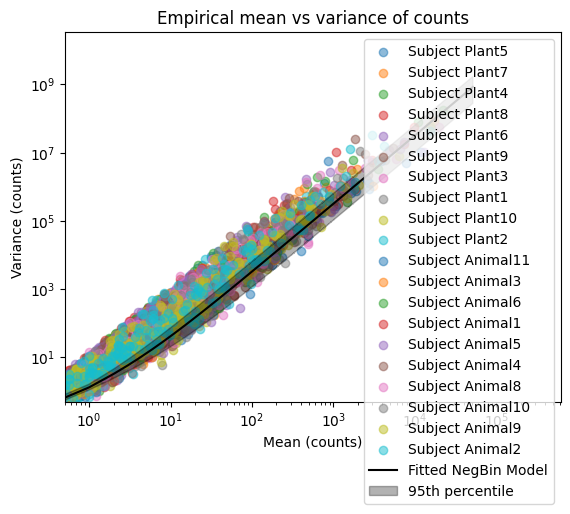

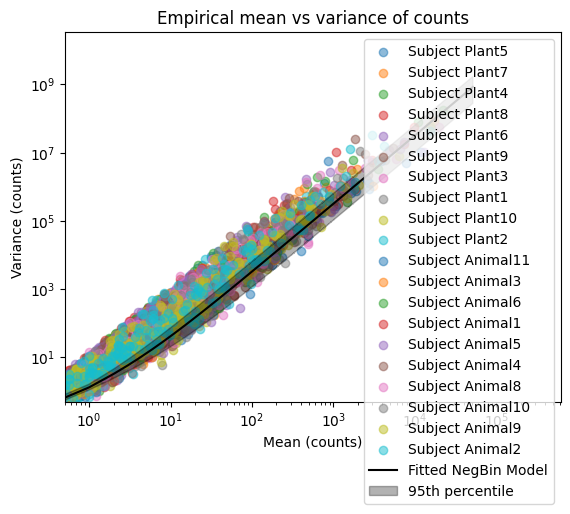

In [39]:
md2.negbin.visualize_learned_negative_binomial_model(mcmc_negbin)

In [41]:
from mdsine2.names import STRNAMES

print('a0', md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A0]))
print('a1', md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A1]))

a0 {'median': 1.6862194964650326e-10, 'mean': 1.9877188970774866e-10, '25th percentile': 1.3674062728389032e-10, '75th percentile': 2.7564715341069903e-10}
a1 {'median': 0.315286126408959, 'mean': 0.34405394215733537, '25th percentile': 0.18434267586418976, '75th percentile': 0.49167955532246155}


In [47]:
import pathlib

a0 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A0])['mean']
a1 = md2.summary(mcmc_negbin.graph[STRNAMES.NEGBIN_A1])['mean']

basepath = pathlib.Path("./mdsine2/david")
basepath.mkdir(exist_ok=True, parents=True)

# Initialize parameters of the model (Seed = 0) burnin=50, total steps=100
params = md2.config.MDSINE2ModelConfig(
    basepath=str(basepath), 
    seed=0,
    burnin=50, 
    n_samples=100, 
    negbin_a0=a0, negbin_a1=a1, 
    checkpoint=50
)

mcmc_david = md2.initialize_graph(params=params, graph_name=dataset.name, subjset=dataset)
mcmcm_david = md2.run_graph(mcmc_david, crash_if_error=True)

[INFO] max_value found: 1000001486.4350425, scaling_factor: 9.99998513567167e-08
[INFO] Normalizing abundances for a max value of 100. Normalization constant: 1.0000E-07


KeyError: 'Plant5'